# DATA SCIENCE PROJECT

In [63]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib
from matplotlib import pyplot as plt
import nltk
# import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
#Import necessary packages
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer, StandardScaler


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Normalizer, StandardScaler
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score

%matplotlib inline


In [3]:
# Settings
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)
pd.set_option('float_format', '{:f}'.format)
pd.set_option('display.max_rows', 500)

## Exploration

In [4]:
# Helper Functions
def get_cat_cols(df):
    return df.select_dtypes(include=['object']).columns
def get_numeric_cols(df):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    return df.select_dtypes(include=numerics).columns

In [5]:
null_prop_col = lambda x: x.isna().mean()

In [6]:
null_prop_row = lambda x: x.isna().sum(axis=1)/x.shape[0]

#### Import data

In [134]:
lifeDF = pd.read_csv('_data/Life Expectancy Data.csv')
suicideDF  = pd.read_csv('_data/who_suicide_statistics.csv')

In [135]:
lifeDF.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.000000,263.000000,62,0.010000,71.279624,65.000000,1154,19.100000,83,6.000000,8.160000,65.000000,0.100000,584.259210,33736494.000000,17.200000,17.300000,0.479000,10.100000
1,Afghanistan,2014,Developing,59.900000,271.000000,64,0.010000,73.523582,62.000000,492,18.600000,86,58.000000,8.180000,62.000000,0.100000,612.696514,327582.000000,17.500000,17.500000,0.476000,10.000000
2,Afghanistan,2013,Developing,59.900000,268.000000,66,0.010000,73.219243,64.000000,430,18.100000,89,62.000000,8.130000,64.000000,0.100000,631.744976,31731688.000000,17.700000,17.700000,0.470000,9.900000
3,Afghanistan,2012,Developing,59.500000,272.000000,69,0.010000,78.184215,67.000000,2787,17.600000,93,67.000000,8.520000,67.000000,0.100000,669.959000,3696958.000000,17.900000,18.000000,0.463000,9.800000
4,Afghanistan,2011,Developing,59.200000,275.000000,71,0.010000,7.097109,68.000000,3013,17.200000,97,68.000000,7.870000,68.000000,0.100000,63.537231,2978599.000000,18.200000,18.200000,0.454000,9.500000


In [136]:
suicideDF.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,nan,277900.000000
1,Albania,1985,female,25-34 years,nan,246800.000000
2,Albania,1985,female,35-54 years,nan,267500.000000
3,Albania,1985,female,5-14 years,nan,298300.000000
4,Albania,1985,female,55-74 years,nan,138700.000000


In [137]:
suicideDF.groupby(['sex']).mean()

,year,suicides_no,population
sex,,,
female,1998.502467,91.631599,1703216.216411
male,1998.502467,294.999181,1624966.054338


In [10]:
suicideDF.shape

(43776, 6)

In [11]:
p_suicideDF = suicideDF.pivot_table('suicides_no', ['country', 'year'], ['age','sex']).reset_index(level=0,drop=False)

In [12]:
p_suicideDF.columns = p_suicideDF.columns.to_flat_index()

In [13]:
p_suicideDF.columns

Index([          ('country', ''), ('15-24 years', 'female'),
         ('15-24 years', 'male'), ('25-34 years', 'female'),
         ('25-34 years', 'male'), ('35-54 years', 'female'),
         ('35-54 years', 'male'),  ('5-14 years', 'female'),
          ('5-14 years', 'male'), ('55-74 years', 'female'),
         ('55-74 years', 'male'),   ('75+ years', 'female'),
           ('75+ years', 'male')],
      dtype='object')

In [14]:
p_suicideDF.columns=pd.Index(['country','15-24_female_suicide','15-24_male_suicide','25-34_female_suicide','25-34_male_suicide',
                     '35-54_female_suicide','35-54_male_suicide','5-14_female_suicide','5-14_male_suicide',
                     '55-74_female_suicide','55-74_male_suicide', '75+_female_suicide','75+_male_suicide'])
# p_suicideDF.rename({"('country', '')": "country" ,"('15-24 years', 'female')" : "15-24_years_female", "('15-24 years', 'male')": "15-24_years_male"}, axis=1).head()



In [15]:
p_suicideDF.head()

,country,15-24_female_suicide,15-24_male_suicide,25-34_female_suicide,25-34_male_suicide,35-54_female_suicide,35-54_male_suicide,5-14_female_suicide,5-14_male_suicide,55-74_female_suicide,55-74_male_suicide,75+_female_suicide,75+_male_suicide
year,,,,,,,,,,,,,
1987,Albania,14.000000,21.000000,4.000000,9.000000,6.000000,16.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
1988,Albania,8.000000,17.000000,5.000000,5.000000,4.000000,14.000000,0.000000,0.000000,3.000000,4.000000,2.000000,1.000000
1989,Albania,5.000000,12.000000,2.000000,18.000000,7.000000,15.000000,0.000000,0.000000,1.000000,6.000000,0.000000,2.000000
1992,Albania,7.000000,9.000000,4.000000,7.000000,2.000000,12.000000,0.000000,0.000000,1.000000,5.000000,0.000000,0.000000
1993,Albania,10.000000,18.000000,7.000000,9.000000,7.000000,10.000000,1.000000,1.000000,2.000000,7.000000,0.000000,1.000000


In [74]:
mergedDF = pd.merge(lifeDF, p_suicideDF, left_on=['Country','Year'], right_on=['country','year'], how='inner')
mergedDF.columns = mergedDF.columns.to_flat_index()

In [76]:
get_cat_cols(mergedDF)

Index(['Country', 'Status', 'country'], dtype='object')

In [77]:
n_cols = get_numeric_cols(mergedDF)

In [78]:
mergedDF.drop(['country'], axis=1, inplace=True)

In [79]:
mergedDF.isna().sum()

Country                            0  
Year                               0  
Status                             0  
Life expectancy                    1  
Adult Mortality                    1  
infant deaths                      0  
Alcohol                            61 
percentage expenditure             0  
Hepatitis B                        239
Measles                            0  
 BMI                               0  
under-five deaths                  0  
Polio                              6  
Total expenditure                  62 
Diphtheria                         6  
 HIV/AIDS                          0  
GDP                                139
Population                         296
 thinness  1-19 years              0  
 thinness 5-9 years                0  
Income composition of resources    48 
Schooling                          48 
15-24_female_suicide               0  
15-24_male_suicide                 0  
25-34_female_suicide               0  
25-34_male_suicide       

In [80]:
cat_vars = mergedDF.select_dtypes(include=['object']).copy().columns
for var in  cat_vars:
        # for each cat add dummy var, drop original column
    mergedDF = pd.concat([mergedDF.drop(var, axis=1), pd.get_dummies(mergedDF[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)



In [105]:
mergedDF.dropna(subset=['Life expectancy '], axis=0, inplace=True)

In [85]:
mergedDF.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,15-24_female_suicide,15-24_male_suicide,25-34_female_suicide,25-34_male_suicide,35-54_female_suicide,35-54_male_suicide,5-14_female_suicide,5-14_male_suicide,55-74_female_suicide,55-74_male_suicide,75+_female_suicide,75+_male_suicide,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,Country_Bahrain,Country_Barbados,Country_Belarus,Country_Belgium,Country_Belize,Country_Bosnia and Herzegovina,Country_Brazil,Country_Brunei Darussalam,Country_Bulgaria,Country_Cabo Verde,Country_Canada,Country_Chile,Country_Colombia,Country_Costa Rica,Country_Croatia,Country_Cuba,Country_Cyprus,Country_Denmark,Country_Dominica,Country_Dominican Republic,Country_Ecuador,Country_Egypt,Country_El Salvador,Country_Estonia,Country_Fiji,Country_Finland,Country_France,Country_Georgia,Country_Germany,Country_Greece,Country_Grenada,Country_Guatemala,Country_Guyana,Country_Haiti,Country_Honduras,Country_Hungary,Country_Iceland,Country_Iraq,Country_Ireland,Country_Israel,Country_Italy,Country_Jamaica,Country_Japan,Country_Jordan,Country_Kazakhstan,Country_Kiribati,Country_Kuwait,Country_Kyrgyzstan,Country_Latvia,Country_Lithuania,Country_Luxembourg,Country_Malaysia,Country_Maldives,Country_Malta,Country_Mauritius,Country_Mexico,Country_Montenegro,Country_Morocco,Country_Netherlands,Country_New Zealand,Country_Nicaragua,Country_Norway,Country_Oman,Country_Panama,Country_Paraguay,Country_Peru,Country_Philippines,Country_Poland,Country_Portugal,Country_Qatar,Country_Republic of Korea,Country_Republic of Moldova,Country_Romania,Country_Russian Federation,Country_Saint Lucia,Country_Saudi Arabia,Country_Serbia,Country_Seychelles,Country_Singapore,Country_Slovakia,Country_Slovenia,Country_South Africa,Country_Spain,Country_Sri Lanka,Country_Suriname,Country_Sweden,Country_Switzerland,Country_Syrian Arab Republic,Country_Tajikistan,Country_Thailand,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Ukraine,Country_United Arab Emirates,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Venezuela (Bolivarian Republic of),Status_Developing
0,2010,76.200000,91.000000,1,5.280000,41.822757,99.000000,10,54.300000,1,99.000000,5.340000,99.000000,0.100000,494.358832,291321.000000,1.400000,1.500000,0.725000,12.500000,6.000000,10.000000,6.000000,9.000000,12.000000,20.000000,2.000000,0.000000,7.000000,20.000000,2.000000,2.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2009,76.100000,91.000000,1,5.790000,348.055952,98.000000,0,53.500000,1,98.000000,5.790000,98.000000,0.100000,4114.136545,2927519.000000,1.500000,1.600000,0.721000,12.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2008,75.300000,1.000000,1,5.610000,36.622068,99.000000,0,52.600000,1,99.000000,5.870000,99.000000,0.100000,437.539647,2947314.000000,1.600000,1.600000,0.713000,12.000000,20.000000,11.000000,9.000000,21.000000,19.000000,37.000000,1.000000,7.000000,7.000000,21.000000,5.000000,2.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2007,75.900000,9.000000,1,5.580000,32.246552,98.000000

In [106]:
n_mergedDF=mergedDF

In [88]:
n_mergedDF.shape

(1424, 140)

In [89]:
n_mergedDF.columns

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ',
       ...
       'Country_Tunisia', 'Country_Turkey', 'Country_Turkmenistan',
       'Country_Ukraine', 'Country_United Arab Emirates',
       'Country_United States of America', 'Country_Uruguay',
       'Country_Uzbekistan', 'Country_Venezuela (Bolivarian Republic of)',
       'Status_Developing'],
      dtype='object', length=140)

In [108]:
X = n_mergedDF.drop(columns=['Life expectancy '], axis=1)

In [109]:
y=n_mergedDF['Life expectancy ']

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

In [112]:
imputer = Imputer(strategy='mean')
X_train_i = pd.DataFrame(imputer.fit_transform(X_train))
X_train_i.columns = X_train.columns
X_train_i.index = X_train.index

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_train_i)
scaled_df = pd.DataFrame(scaled_data)
scaled_df.columns = X_train_i.columns



/Users/surmelie1/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [113]:
lm_model = RandomForestRegressor(random_state=23)

In [114]:
lm_model.fit(scaled_df, y_train)

/Users/surmelie1/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=23, verbose=0, warm_start=False)

In [115]:
y_preds_tr = lm_model.predict(scaled_df)
# y_preds_tst = lm_model.predict(X_test)

train_score = r2_score(y_train, y_preds_tr)
# test_score = r2_score(y_test, y_preds_tst)
    

In [116]:
train_score

0.979014059294857

In [117]:

X_test_i = pd.DataFrame(imputer.transform(X_test))
X_test_i.columns = X_test.columns
X_test_i.index = X_test.index


scaled_data_tst = scaler.transform(X_test_i)
scaled_df_tst = pd.DataFrame(scaled_data_tst)
scaled_df_tst.columns = X_test_i.columns



In [118]:
y_preds_tst = lm_model.predict(scaled_df_tst)
# y_preds_tst = lm_model.predict(X_test)

train_score = r2_score(y_test, y_preds_tst)
# test_score = r2_score(y_test, y_preds_tst)
    

In [119]:
train_score

0.867167024685651

MSE: 3.72


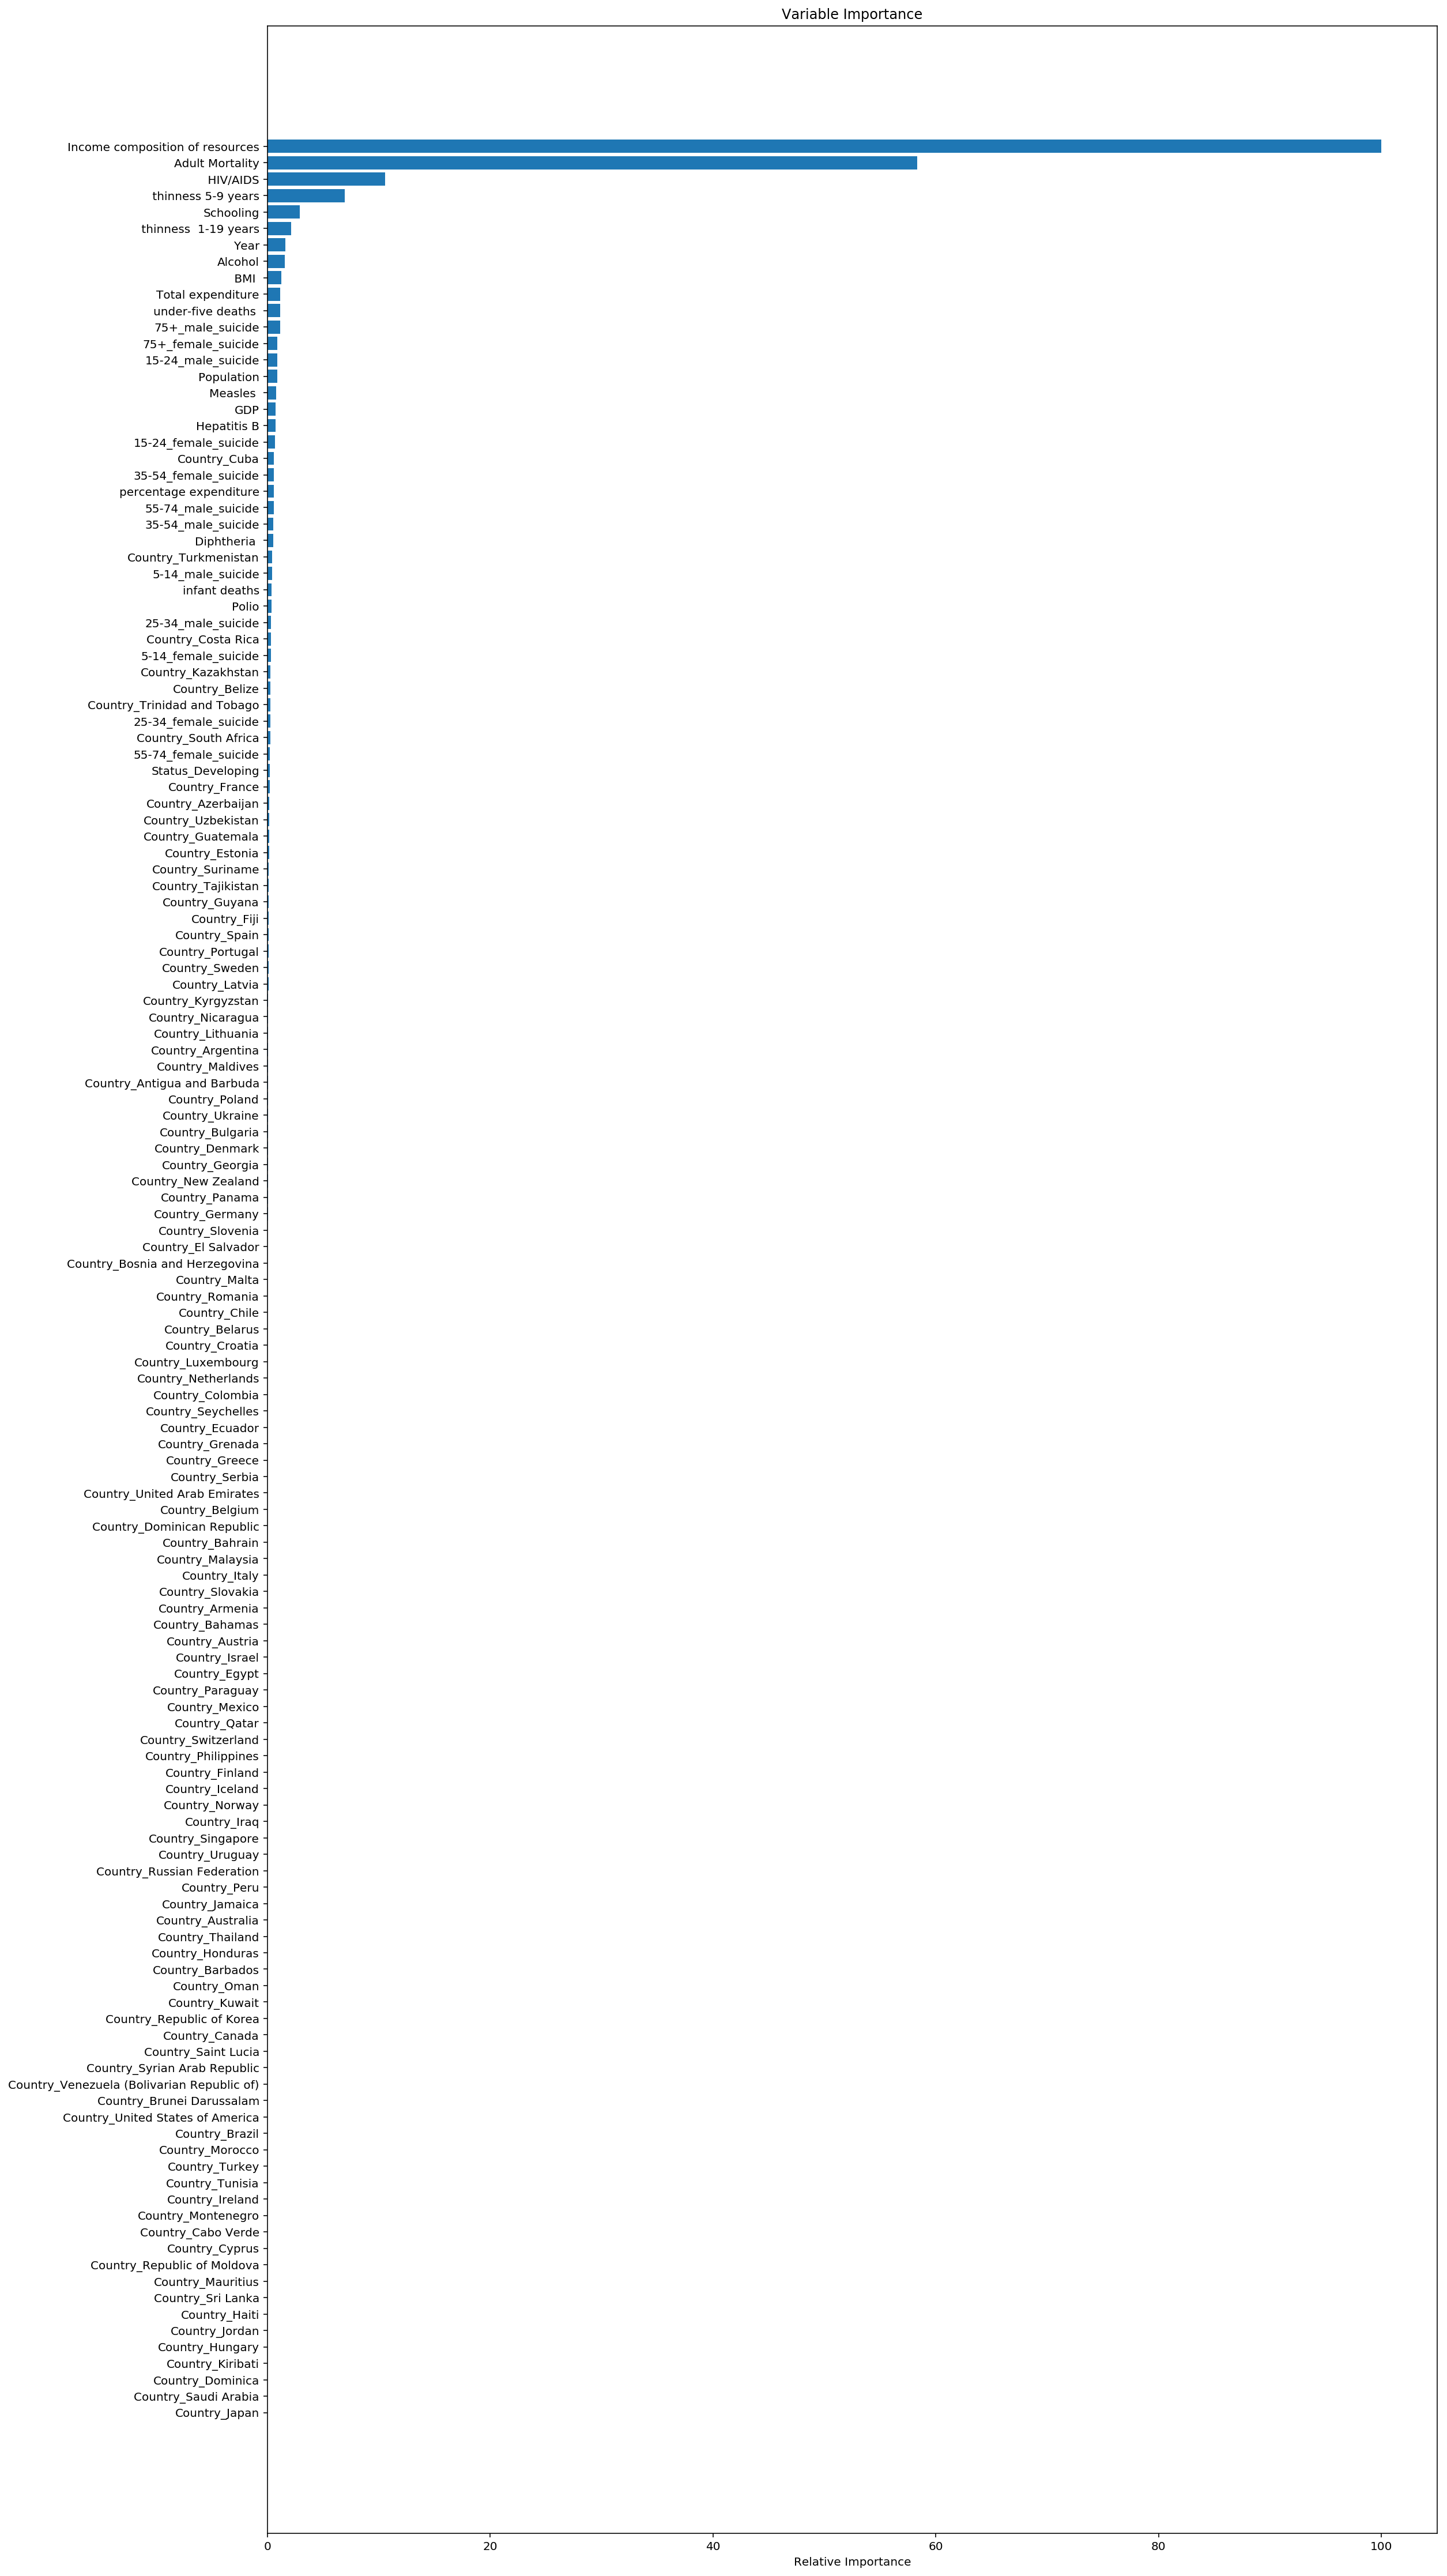

In [131]:
mse = mean_squared_error(y_test, lm_model.predict(scaled_df_tst ))
print("MSE: %.2f" % mse)
fig = plt.figure(figsize=(40,40))
# Plot feature importance
feature_importance = lm_model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
n_mergedDF.groupby()

In [120]:
mse = mean_squared_error(y_test, lm_model.predict(scaled_df_tst))

In [121]:
mse

3.7159461702127654

In [42]:
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    
    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test




In [43]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

# #Use the function
# coef_df = coef_weights(lm_model.coef_, X_train)

# #A quick look at the top results
# coef_df.head(50)

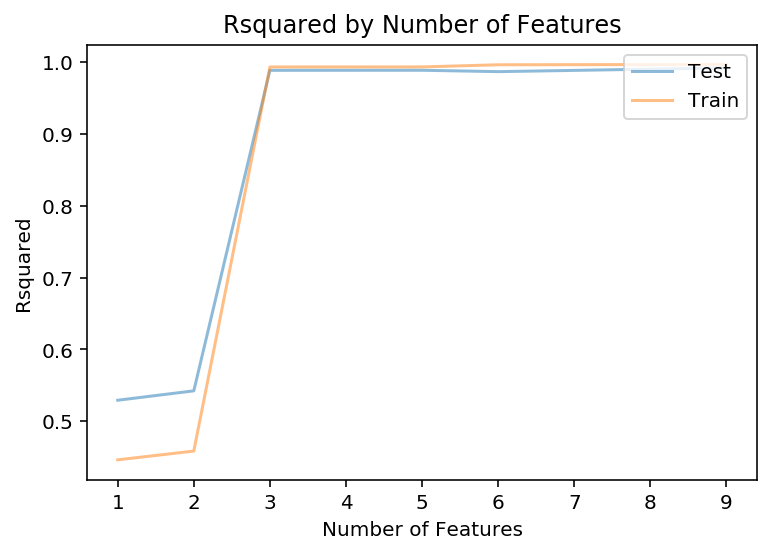

In [44]:
cutoffs = [2500, 1000, 100, 50, 30, 25, 10, 5 ,3, 2]

r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)



In [45]:
#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(50)

AttributeError: 'LinearRegression' object has no attribute 'coef_'